In [34]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import h5py
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut

from importlib import reload
reload(ut)
import scipy.ndimage.filters as sfi
import scipy.stats as sst
import scipy.ndimage.measurements as snm
from mpl_toolkits.mplot3d import Axes3D
import figure_ground_analysis as fg
reload(fg)
import pdb

In [35]:
def compute_rg(thisfold,thisfile,lb=27,ub=34):
    matfile = datafoldbase + thisfold + thisfile + '.mat'
    info = ut.loadmat(matfile,'info')
    frame = info['frame'][()]
    total_frames = len(frame)
    looks_good = (np.where((np.diff(frame)>lb) & (np.diff(frame)<ub))[0])
    rg = (looks_good[0],looks_good[-1]-total_frames+2)
#     print(frame[-10:])
    return rg

In [57]:
folds = []
files = []
rets = []
adjust_fns = []
rgs = []
criteria = []
datafoldbases = []


def tack_on(thisfold,thisfile,retnumber,frame_adjust=None,rg=(1,0),criterion=lambda x: np.abs(x)>100,datafoldbase=None):
    folds.append(thisfold)
    files.append(thisfile)
    rets.append(retnumber)
    adjust_fns.append(frame_adjust)
    rgs.append(rg)
    criteria.append(criterion)
    datafoldbases.append(datafoldbase)

    # NO RUNNING SAVED FOR THIS ONE
#thisfold = '181127/M10073/'
#thisfile = 'M10073_385_004'
#retnumber = '002'
#datafoldbase = '/media/mossing/backup_1/data/2P/'
#rg = (1,0)
#frame_adjust = lambda x: np.delete(x,0)
#tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190202/M10075/'
thisfile =  'M10075_350_006'
retnumber = '004'
datafoldbase = '/home/mossing/modulation/matfiles/'
rg = (1,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190304/M10077/'
thisfile =  'M10077_500_004'
retnumber = '002'
datafoldbase = '/home/mossing/modulation/matfiles/'
rg = (1,-1)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190607/M10443/'
thisfile = 'M10443_320_003'
retnumber = '004'
thisrg = compute_rg(thisfold,thisfile)
tack_on(thisfold,thisfile,retnumber,rg=thisrg,criterion=lambda x: np.abs(x)>100,datafoldbase=datafoldbase)

thisfold = '190620/M10619/'
thisfile = 'M10619_285_004'
retnumber = '003'
# datafoldbase = '/media/mossing/backup_1/data/2P/'
thisrg = compute_rg(thisfold,thisfile)
tack_on(thisfold,thisfile,retnumber,rg=thisrg,criterion=lambda x: np.abs(x)>100,datafoldbase=datafoldbase)

thisfold = '190620/M10616/'
thisfile = 'M10616_320_004'
retnumber = '003'
# datafoldbase = '/media/mossing/backup_1/data/2P/'
thisrg = compute_rg(thisfold,thisfile)
tack_on(thisfold,thisfile,retnumber,rg=thisrg,criterion=lambda x: np.abs(x)>100,datafoldbase=datafoldbase)

# can't find running for this one
# thisfold = '190624/M10615/'
# thisfile = 'M10615_355_005'
# retnumber = '004'
# thisrg = compute_rg(thisfold,thisfile)
# tack_on(thisfold,thisfile,retnumber,rg=thisrg,criterion=lambda x: np.abs(x)>100,datafoldbase=datafoldbase)

thisfold = '190627/M10616/'
thisfile = 'M10616_365_007'
retnumber = '006'
thisrg = compute_rg(thisfold,thisfile)
tack_on(thisfold,thisfile,retnumber,rg=thisrg,criterion=lambda x: np.abs(x)>100,datafoldbase=datafoldbase)

In [58]:
expttype = 'figure_ground_0'
with h5py.File(dsname,mode='r+') as ds:
    keylist = [key for key in ds.keys()]
    for k in range(len(keylist)):
        print([key for key in ds[keylist[k]].keys()])
        if expttype in ds[keylist[k]]:
            fge = ds[keylist[k]][expttype]
            print(fge['stimulus_id'][:])
            del ds[keylist[k]][expttype]

['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'size_contrast_0']
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


In [59]:
reload(fg)
procname = 'procfiles/pyr_l4_figure_ground_proc.hdf5'
dsname = '../shared_data/pyr_l4_data_struct.hdf5'
if os.path.exists(procname):
    os.remove(procname)
# soriavg,strialavg,lb,ub,pval_fig,pval_grnd,nbydepth = fg.analyze_everything(folds,files,rets,adjust_fns)
keylist = fg.analyze_simply(folds,files,rets,[None]*len(folds),datafoldbase=datafoldbases,stimfoldbase='/home/mossing/modulation/visual_stim/',rgs=rgs,procname=procname)
# fg.analyze_simply(folds,files,rets,adjust_fns,rgs,datafoldbase=datafoldbases,stimfoldbase='/home/mossing/modulation/visual_stim/',procname=procname)
# with h5py.File(procname,mode='r') as proc:

/home/mossing/modulation/matfiles/190202/M10075/ot/M10075_350_006_ot_000.rois
(221, 10090)
/home/mossing/modulation/matfiles/190202/M10075/ot/M10075_350_006_ot_001.rois
(277, 10090)
/home/mossing/modulation/matfiles/190202/M10075/ot/M10075_350_006_ot_002.rois
(239, 10090)
/home/mossing/modulation/matfiles/190202/M10075/ot/M10075_350_006_ot_003.rois
(153, 10090)
roi 107 all zeros
no mean image data for /home/mossing/modulation/visual_stim/190202/M10075/M10075_350_006.mat
retinotopy not saved for session_190202_M10075
/home/mossing/modulation/matfiles/190304/M10077/ot/M10077_500_004_ot_000.rois
(457, 6412)
/home/mossing/modulation/matfiles/190304/M10077/ot/M10077_500_004_ot_001.rois
(479, 6412)
/home/mossing/modulation/matfiles/190304/M10077/ot/M10077_500_004_ot_002.rois
(464, 6412)
/home/mossing/modulation/matfiles/190304/M10077/ot/M10077_500_004_ot_003.rois
(365, 6412)
no mean image data for /home/mossing/modulation/visual_stim/190304/M10077/M10077_500_004.mat
retinotopy not saved for 

In [61]:
with h5py.File(procname,mode='r') as proc:
    grouplist = fg.add_data_struct_h5_simply(dsname,cell_type='PyrL4', keylist=keylist[2:], frame_rate_dict=None, proc=proc, nbefore=8, nafter=8)

In [60]:
with h5py.File(procname,mode='r') as proc:
    keylist = list(proc.keys())
    for key in keylist:
#         print(list(proc[key].keys()))
        print([proc[key]['paramdict'][x][:].max() for x in proc[key]['paramdict'].keys()])

[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]


In [ ]:
reload(fg)
data_struct = fg.gen_full_data_struct(proc=proc,keylist=keylist)

In [7]:
keylist = list(data_struct.keys())

In [8]:
data_struct[keylist[0]]['F'].shape

(890, 400, 16)

In [9]:
k = 1

In [10]:
order = data_struct[keylist[k]]['order']
order

['ctrl', 'fig', 'grnd', 'iso', 'cross']

In [11]:
ncells = data_struct[keylist[k]]['F'].shape[0]
nangle = 8

In [25]:
def scatter_two_means(grp1,grp2,alpha=1,s=20):
    plt.scatter(data_struct[keylist[k]]['F'][lkat][:,grp1][:,:,4:-4].mean(-1).mean(-1),data_struct[keylist[k]]['F'][lkat][:,grp2][:,:,4:-4].mean(-1).mean(-1),alpha=alpha,s=s)
    plt.xlim(0,0.2)
    plt.ylim(0,0.2)
    plt.plot((0,0.2),(0,0.2),c='r')

In [38]:
k = 1
center = data_struct[keylist[k]]['stimulus_id'][0] == 1
ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
iso = data_struct[keylist[k]]['stimulus_id'][0] == 3
cross = data_struct[keylist[k]]['stimulus_id'][0] == 4
lkat = np.logical_and(data_struct[keylist[k]]['rf_distance_deg']<50,data_struct[keylist[k]]['rf_mapping_pval']<0.05)
x = data_struct[keylist[k]]['F'][:,center][:,:,4:-4].mean(-1).mean(-1)
y = data_struct[keylist[k]]['F'][:,ground][:,:,4:-4].mean(-1).mean(-1)
lkat = np.logical_and(lkat,x>y)

/home/mossing/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


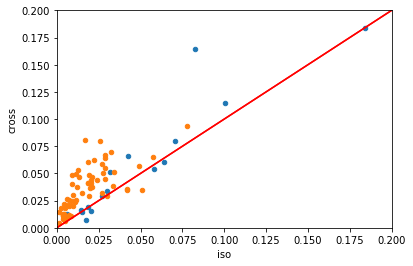

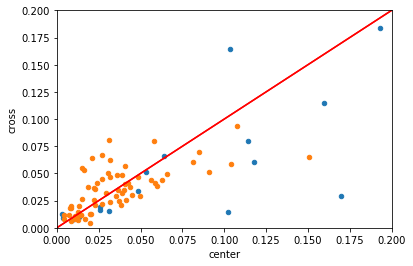

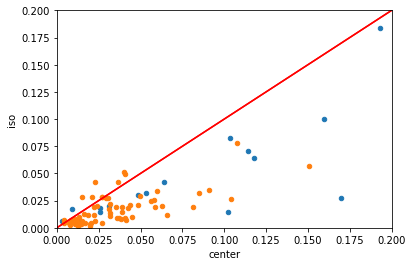

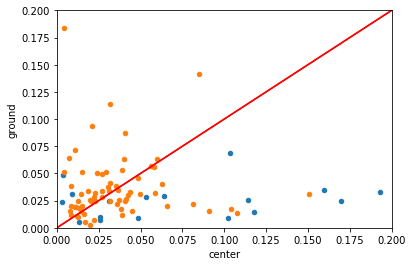

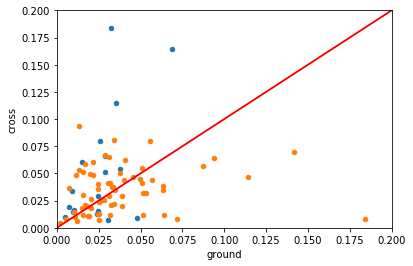

In [43]:
for k in range(2):
    center = data_struct[keylist[k]]['stimulus_id'][0] == 1
    ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
    iso = data_struct[keylist[k]]['stimulus_id'][0] == 3
    cross = data_struct[keylist[k]]['stimulus_id'][0] == 4
    lkat = np.logical_and(data_struct[keylist[k]]['rf_distance_deg']<5,data_struct[keylist[k]]['rf_mapping_pval']<0.05)
    x = data_struct[keylist[k]]['F'][:,center][:,:,4:-4].mean(-1).mean(-1)
    y = data_struct[keylist[k]]['F'][:,ground][:,:,4:-4].mean(-1).mean(-1)
    lkat = np.logical_and(lkat,lkat)

    plt.figure(1)
    scatter_two_means(iso,cross)
    plt.xlabel('iso')
    plt.ylabel('cross')

    plt.figure(2)
    scatter_two_means(center,cross)
    plt.xlabel('center')
    plt.ylabel('cross')

    plt.figure(3)
    scatter_two_means(center,iso)
    plt.xlabel('center')
    plt.ylabel('iso')

    plt.figure(4)
    scatter_two_means(center,ground)
    plt.xlabel('center')
    plt.ylabel('ground')

    plt.figure(5)
    scatter_two_means(ground,cross)
    plt.xlabel('ground')
    plt.ylabel('cross')

(0, 0.2)

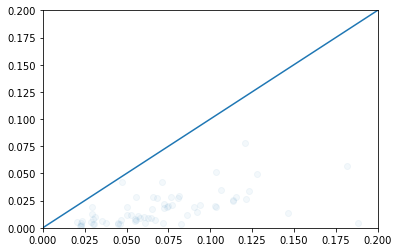

In [44]:
plt.figure()
center = data_struct[keylist[k]]['stimulus_id'][0] == 1
ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
iso = data_struct[keylist[k]]['stimulus_id'][0] == 3
F1 = data_struct[keylist[k]]['F'][lkat][:,center][:,:,4:-4].mean(-1).mean(-1)
F2 = data_struct[keylist[k]]['F'][lkat][:,ground][:,:,4:-4].mean(-1).mean(-1)
F3 = data_struct[keylist[k]]['F'][lkat][:,iso][:,:,4:-4].mean(-1).mean(-1)
plt.scatter(F1+F2,F3,alpha=0.05)
plt.plot((0,0.2),(0,0.2))
plt.xlim(0,0.2)
plt.ylim(0,0.2)


(0, 0.2)

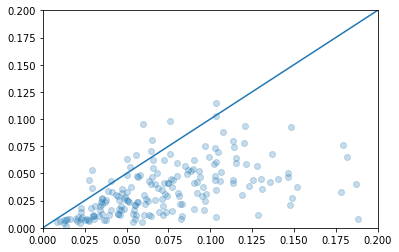

In [58]:
plt.figure()
center = data_struct[keylist[k]]['stimulus_id'][0] == 1
ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
cross = data_struct[keylist[k]]['stimulus_id'][0] == 4
F1 = data_struct[keylist[k]]['F'][lkat][:,center][:,:,4:-4].mean(-1).mean(-1)
F2 = data_struct[keylist[k]]['F'][lkat][:,ground][:,:,4:-4].mean(-1).mean(-1)
F3 = data_struct[keylist[k]]['F'][lkat][:,cross][:,:,4:-4].mean(-1).mean(-1)
plt.scatter(F1+F2,F3,alpha=0.25)
plt.plot((0,0.2),(0,0.2))
plt.xlim(0,0.2)
plt.ylim(0,0.2)

In [59]:
interesting = F1+F2<F3

In [62]:
ori_tuning = np.zeros((ncells,nangle,5))
ori_lb = np.zeros((ncells,nangle,5))
ori_ub = np.zeros((ncells,nangle,5))
for i in range(nangle):
    for j in range(5):
        thisangle = np.logical_and(data_struct[keylist[k]]['stimulus_id'][0]==j,data_struct[keylist[k]]['stimulus_id'][1]==i*45)
        tavg = np.nanmean(data_struct[keylist[k]]['F'][:,thisangle][:,:,4:-4],-1)
        for ii in range(tavg.shape[0]):
            ori_lb[ii,i,j],ori_ub[ii,i,j] = ut.bootstrap(tavg[ii],np.nanmean,axis=0,pct=(16,84))
        ori_tuning[:,i,j] = np.nanmean(tavg,-1)

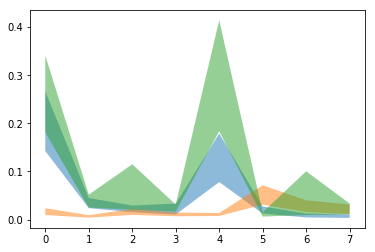

In [67]:
plt.figure()
ind = 7
def plot_center_ground_cross(ind):
    for which in (1,2,4):
        plt.fill_between(np.arange(8),ori_lb[lkat][interesting][ind,:,which],ori_ub[lkat][interesting][ind,:,which],alpha=0.5)
        
plot_center_ground_cross(6)

In [64]:
indmax = interesting.sum()

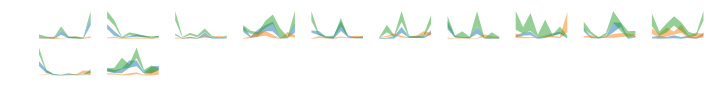

In [65]:
plt.figure(figsize=(12,12))
for i in range(indmax):
    plt.subplot(18,10,i+1)
    plot_center_ground_cross(i)
    plt.axis('off')